In [9]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

In [10]:
data = pd.read_csv("C:/Users/purva/OneDrive/Desktop/csvsss/delivery_time.csv")

# EDA

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [12]:
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# Correlation Analysis

In [13]:
data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [16]:
data=data.rename({'Delivery Time':'delivery_time','Sorting Time':'sorting_time'},axis=1)

c:\Users\purva\anaconda3.1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='delivery_time', ylabel='Density'>

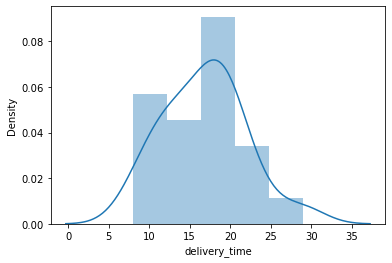

In [17]:
sns.distplot(data['delivery_time'])

c:\Users\purva\anaconda3.1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sorting_time', ylabel='Density'>

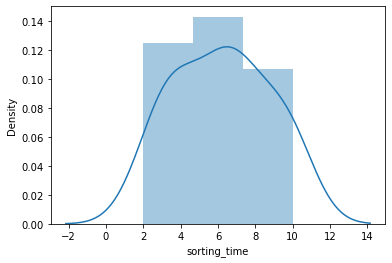

In [18]:
sns.distplot(data['sorting_time'])

# Model Building

In [19]:
model = smf.ols("delivery_time ~ sorting_time",data=data).fit()

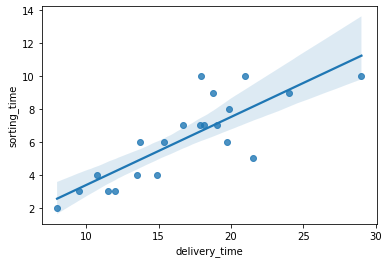

In [20]:
sns.regplot(x='delivery_time',y='sorting_time',data=data);

In [33]:
#Finding parameter coefficient
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [22]:
#Finding T-values & P-values
print(model.tvalues,'\n',model.pvalues)

Intercept       3.823349
sorting_time    6.387447
dtype: float64 
 Intercept       0.001147
sorting_time    0.000004
dtype: float64


In [23]:
#Finding Rsquared values
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

# Model Prediction

In [28]:
newdata= pd.Series([11,14])

In [29]:
data_pred= pd.DataFrame(newdata,columns=['sorting_time'])

In [30]:
data_pred

,sorting_time
0,11
1,14


In [31]:
model.predict(data_pred)

0    24.721953
1    29.669013
dtype: float64